# Redes Neuronales Artificiales (RNA)

Las **Redes Neuronales Artificiales (RNA)** son modelos matemáticos y computacionales inspirados en el cerebro humano.  
Están diseñadas para **aprender patrones a partir de datos** y se usan en problemas de **clasificación, predicción y reconocimiento**.

## 🔹 Estructura básica de una RNA
- **Capa de entrada** → recibe los datos (ejemplo: píxeles de una imagen, palabras en un texto).  
- **Capas ocultas** → procesan la información aplicando pesos, sesgos y funciones de activación.  
- **Capa de salida** → produce el resultado final (clase, probabilidad, número).  

Cada neurona aplica la operación:


$z = \sum_{i} w_i x_i + b \quad \rightarrow \quad y = f(z)$

donde \(f(z)\) es la **función de activación** (ReLU, sigmoide, tanh, etc.).

---

# Capas Convolucionales

Las **capas convolucionales (Conv layers)** son fundamentales en **visión por computadora, audio y texto**.  
Funcionan aplicando **filtros o kernels** que recorren la entrada y extraen **características locales**.

## 🔹 Tipos principales de capas de convolución en Keras
- **Conv1D** → secuencias (texto, audio, series temporales).  
- **Conv2D** → imágenes (alto × ancho).  
- **Conv3D** → videos o datos volumétricos.  
- **SeparableConv2D** → convolución más eficiente (usada en MobileNet).  
- **Conv2DTranspose** → deconvolución para generar imágenes (GANs, autoencoders).  
- **DepthwiseConv2D** → aplica filtros por canal, optimiza el cálculo.  

### Parámetros importantes
- `filters` → número de filtros a aprender.  
- `kernel_size` → tamaño del filtro (ej. 3, 5, 7).  
- `strides` → pasos que avanza el filtro.  
- `padding` → `"valid"` (sin relleno) o `"same"` (mantiene tamaño).  
- `activation` → función de activación.  

Ejemplo:
```python
tf.keras.layers.Conv1D(filters=32, kernel_size=(3), padding="same", activation="relu")



# Uso de Conv1D en Texto Secuencial

**`Conv1D`** es ideal para **datos secuenciales** como texto, audio o series temporales.  
En **Procesamiento de Lenguaje Natural (NLP)** se utiliza para detectar **patrones locales de palabras**, funcionando como un detector de *n-gramas* (frases cortas o combinaciones de palabras importantes).

## Flujo típico de Conv1D en texto

1. **Tokenización**: convertir el texto en índices de palabras.
```
  El texto "me encantó la película" se convierte en secuencia de números:
  "me" → 5, "encantó" → 21, "la" → 3, "película" → 56
→ [5, 21, 3, 56]
```
2. **Embedding**: cada palabra se transforma en un vector denso de tamaño n (representación numérica).  
```
p.e. dim_embedding = 3
"me" → [0.2, -0.1, 0.8]

"encantó" → [0.9, 0.4, -0.3]

"la" → [0.3, 0.5, -0.1]

"película" → [0.1, 0.4, 0.7]

nuestra secuencia sería: [[0.2, -0.1, 0.8], [0.9, 0.4, -0.3], [0.3, 0.5, -0.1], [0.1, 0.4, 0.7]]
```
3. **Conv1D**: detecta patrones en secuencias de embeddings (ej. frases como “muy buena película”).  
```python
#Ejemplo de capa Conv1D
tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation="relu")

Filtro → matriz de pesos entrenables

kernel_size → tamaño del filtro, p.e kernel_size = 3 el filtro mirará 3 valores consecutivos de la secuencia.
```
4. **Pooling**: resume la información, destacando los patrones más relevantes.  
5. **Dense**: capa totalmente conectada para la clasificación final (positiva/negativa, categorías de texto, etc.).




🧩 Celda 1 — Importar TensorFlow y revisar versión


In [ ]:
import tensorflow as tf
print("Versión de TensorFlow:", tf.__version__)

Versión de TensorFlow: 2.19.0


🧠 Celda 2 — Definir una red neuronal con Conv1D

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros básicos
vocab_size = 5000   # tamaño del vocabulario (5000 palabras)
maxlen = 100        # longitud máxima de las secuencias (padding) (palabras que pueden haber en una oración, si es menor a 100 se rellenan con 0)
embedding_dim = 50  # dimensión de los embeddings (cada palabra se representa como un vector de dimensión 50)

# Definición del modelo
model = Sequential([
    Embedding(input_dim= 5000, output_dim= 50, input_length= 100),
    Conv1D(filters=32, kernel_size=3, activation="relu"),
    GlobalMaxPooling1D(),
    Dropout(0.1),
    Dense(1, activation="sigmoid",  kernel_regularizer=l2(0.01))
])

model.build(input_shape=(None, 100))  # None = tamaño del batch
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 50)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 98, 32)         │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,865 (995.57 KB)

 Trainable params: 254,865 (995.57 KB)

 Non-trainable params: 0 (0.00 B)

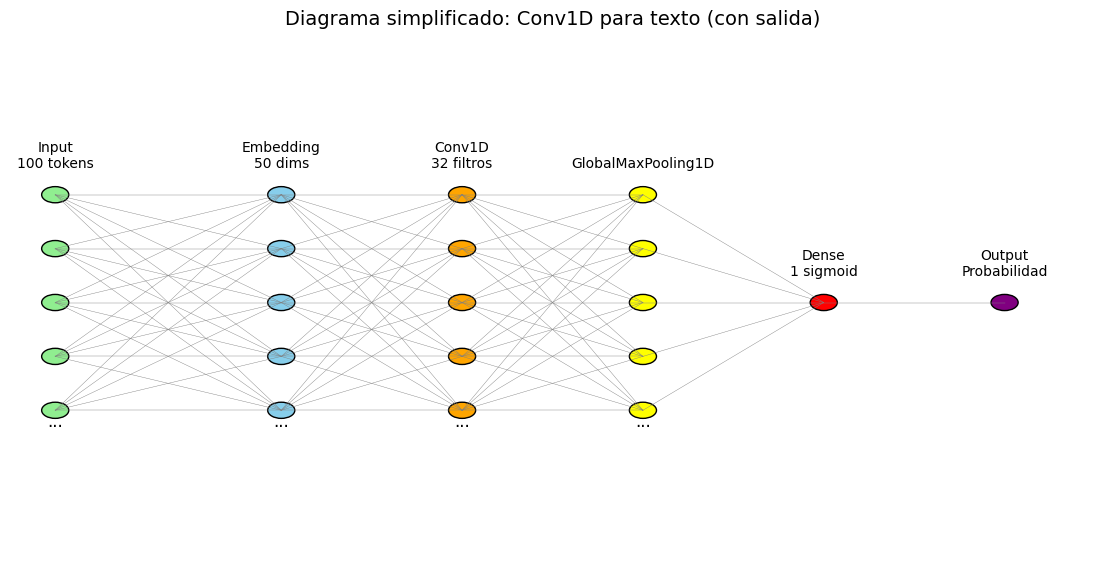

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_layer_simplified(ax, n_neurons, x, y_start, layer_name, neuron_color='skyblue', show_neurons=5):
    # Mostramos solo show_neurons neuronas, el resto se indica con "..." si hay más
    n_draw = min(n_neurons, show_neurons)
    ys = np.linspace(y_start, y_start - n_draw + 1, n_draw)
    for y in ys:
        circle = plt.Circle((x, y), 0.15, color=neuron_color, ec='black')
        ax.add_patch(circle)
    if n_neurons > show_neurons:
        ax.text(x, ys[-1]-0.3, "...", ha='center', fontsize=12)
    ax.text(x, y_start + 0.5, layer_name, ha='center', fontsize=10)
    return ys

fig, ax = plt.subplots(figsize=(14,7))
ax.set_xlim(0, 12)
ax.set_ylim(-5, 5)
ax.axis('off')

# Dibujar capas simplificadas
input_ys = draw_layer_simplified(ax, 100, x=0.5, y_start=2, layer_name='Input\n100 tokens', neuron_color='lightgreen', show_neurons=5)
embedding_ys = draw_layer_simplified(ax, 50, x=3, y_start=2, layer_name='Embedding\n50 dims', neuron_color='skyblue', show_neurons=5)
conv_ys = draw_layer_simplified(ax, 32, x=5, y_start=2, layer_name='Conv1D\n32 filtros', neuron_color='orange', show_neurons=5)
pool_ys = draw_layer_simplified(ax, 32, x=7, y_start=2, layer_name='GlobalMaxPooling1D', neuron_color='yellow', show_neurons=5)
dense_ys = draw_layer_simplified(ax, 1, x=9, y_start=0, layer_name='Dense\n1 sigmoid', neuron_color='red')
output_ys = draw_layer_simplified(ax, 1, x=11, y_start=0, layer_name='Output\nProbabilidad', neuron_color='purple')

# Conectar capas con líneas (solo con las neuronas visibles)
def connect_layers_simplified(ax, ys1, x1, ys2, x2):
    for y1 in ys1:
        for y2 in ys2:
            ax.plot([x1, x2], [y1, y2], color='gray', linewidth=0.3)

connect_layers_simplified(ax, input_ys, 0.5, embedding_ys, 3)
connect_layers_simplified(ax, embedding_ys, 3, conv_ys, 5)
connect_layers_simplified(ax, conv_ys, 5, pool_ys, 7)
connect_layers_simplified(ax, pool_ys, 7, dense_ys, 9)
connect_layers_simplified(ax, dense_ys, 9, output_ys, 11)

plt.title("Diagrama simplificado: Conv1D para texto (con salida)", fontsize=14)
plt.show()


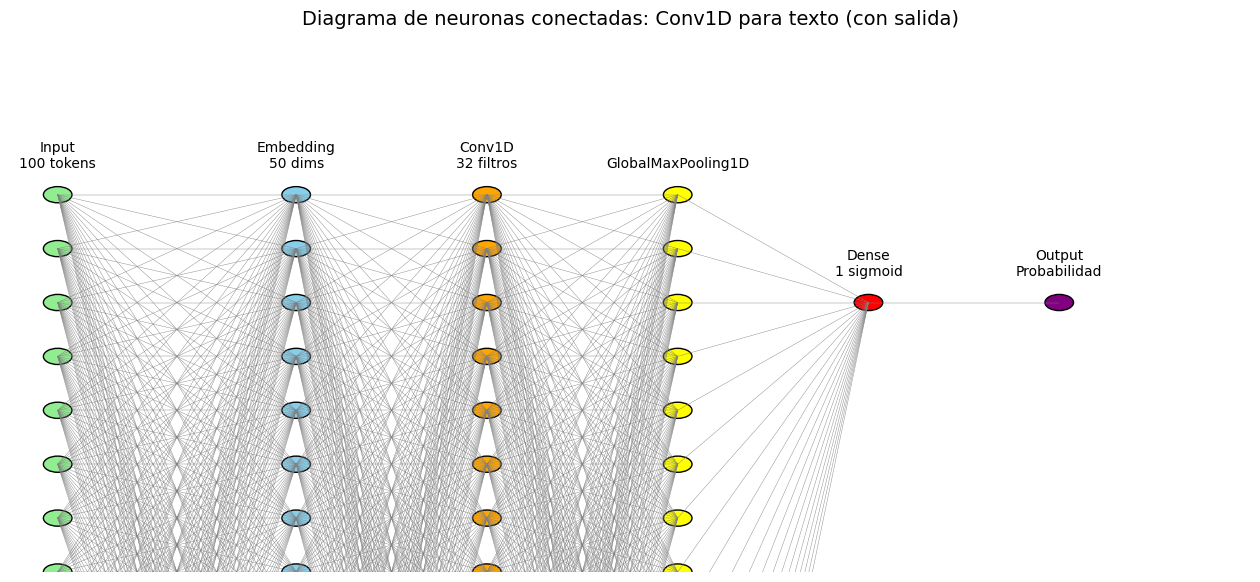

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_layer(ax, n_neurons, x, y_start, layer_name, neuron_color='skyblue', max_show=20):
    n_draw = min(n_neurons, max_show)
    ys = np.linspace(y_start, y_start - n_draw + 1, n_draw)
    for y in ys:
        circle = plt.Circle((x, y), 0.15, color=neuron_color, ec='black')
        ax.add_patch(circle)
    ax.text(x, y_start + 0.5, layer_name, ha='center', fontsize=10)
    return ys

# Ajustar figura más ancha para que no se corte
fig, ax = plt.subplots(figsize=(16,7))  # más ancho

ax.set_xlim(0, 13)   # más espacio horizontal
ax.set_ylim(-5, 5)   # mismo espacio vertical
ax.axis('off')

# Dibujar capas
input_ys = draw_layer(ax, 100, x=0.5, y_start=2, layer_name='Input\n100 tokens', neuron_color='lightgreen')
embedding_ys = draw_layer(ax, 50, x=3, y_start=2, layer_name='Embedding\n50 dims', neuron_color='skyblue', max_show=20)
conv_ys = draw_layer(ax, 32, x=5, y_start=2, layer_name='Conv1D\n32 filtros', neuron_color='orange')
pool_ys = draw_layer(ax, 32, x=7, y_start=2, layer_name='GlobalMaxPooling1D', neuron_color='yellow')
dense_ys = draw_layer(ax, 1, x=9, y_start=0, layer_name='Dense\n1 sigmoid', neuron_color='red')
output_ys = draw_layer(ax, 1, x=11, y_start=0, layer_name='Output\nProbabilidad', neuron_color='purple')

# Conectar capas con líneas
def connect_layers(ax, ys1, x1, ys2, x2):
    for y1 in ys1:
        for y2 in ys2:
            ax.plot([x1, x2], [y1, y2], color='gray', linewidth=0.3)

connect_layers(ax, input_ys, 0.5, embedding_ys, 3)
connect_layers(ax, embedding_ys, 3, conv_ys, 5)
connect_layers(ax, conv_ys, 5, pool_ys, 7)
connect_layers(ax, pool_ys, 7, dense_ys, 9)
connect_layers(ax, dense_ys, 9, output_ys, 11)

plt.title("Diagrama de neuronas conectadas: Conv1D para texto (con salida)", fontsize=14)
plt.show()


⚙️ Celda 3 — Compilar el modelo

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


# Early stopping para detener entrenamiento si la validación deja de mejorar
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

📊 Celda 4 — Datos de entrenamiento (ejemplo sintético de texto)

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar solo datos de entrenamiento
(X, y), _ = imdb.load_data(num_words=vocab_size)  # ignoramos los datos de prueba con "_"

# Padding para que todas las secuencias tengan la misma longitud
X = pad_sequences(X, maxlen=maxlen)

print("Ejemplo de secuencia:", X[0][:10], "... etiqueta:", y[0])

Ejemplo de secuencia: [1415   33    6   22   12  215   28   77   52    5] ... etiqueta: 1


🏋️ Celda 5 — Entrenamiento

In [ ]:
# Entrenamiento
history = model.fit(
    X, y,
    epochs=100,
    batch_size=128, #controla cuántas muestras procesa el modelo antes de actualizar sus pesos.
    validation_split=0.2, #reserva un subconjunto de tus datos de entrenamiento, diagnostica sobreajuste y subajuste.
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5135 - loss: 0.7077 - val_accuracy: 0.7238 - val_loss: 0.6685
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6019 - loss: 0.6603 - val_accuracy: 0.7402 - val_loss: 0.5928
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6999 - loss: 0.6066 - val_accuracy: 0.7676 - val_loss: 0.5433
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7256 - loss: 0.5772 - val_accuracy: 0.7716 - val_loss: 0.5232
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7383 - loss: 0.5560 - val_accuracy: 0.7834 - val_loss: 0.5068
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7466 - loss: 0.5414 - val_accuracy: 0.7894 - val_loss: 0.4937
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7551 - loss: 0.5277 - val_accuracy: 0.7992 - val_loss: 0.4780
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7681 - loss: 0.5075 - 

📈 Celda 6 — Curva de pérdida y precisión

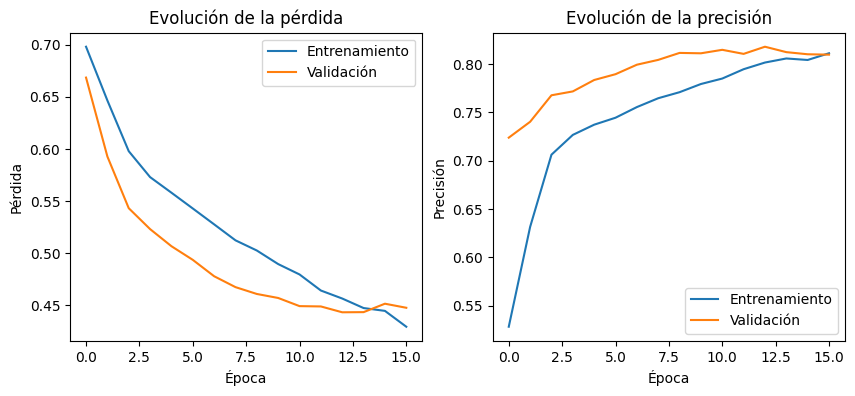

In [ ]:
import matplotlib.pyplot as plt
#Visualización
plt.figure(figsize=(10,4))

# Pérdida
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Entrenamiento")
plt.plot(history.history["val_loss"], label="Validación")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida")
plt.legend()

# Precisión
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.title("Evolución de la precisión")
plt.legend()

plt.show()

🔍 Celda 7 — Evaluación y predicciones

In [ ]:
import numpy as np

# Precisión final en entrenamiento y validación
final_train_acc = history.history["accuracy"][-1]      # último valor de accuracy
final_val_acc   = history.history["val_accuracy"][-1]  # último valor de val_accuracy

print(f"Precisión final en entrenamiento: {final_train_acc:.3f}")
print(f"Precisión final en validación: {final_val_acc:.3f}")

# Predicciones de ejemplo sobre las primeras 5 reseñas
pred = model.predict(X[:10])

# Mostrar probabilidades redondeadas
print("Predicciones (probabilidades):\n", np.round(pred, 4).ravel())

# Umbral a 0.5 para convertir a clases {0,1}
print("Clases predichas:", (pred.ravel() >= 0.5).astype(int).tolist())

print("Etiquetas reales:", y[:10])

Precisión final en entrenamiento: 0.811
Precisión final en validación: 0.810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicciones (probabilidades):
 [7.531e-01 2.122e-01 2.150e-02 6.628e-01 8.000e-04 5.923e-01 5.699e-01
 7.900e-03 8.292e-01 1.602e-01]
Clases predichas: [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]
Etiquetas reales: [1 0 0 1 0 0 1 0 1 0]


## ¿Por qué no Q-Learning?
- Q-Learning es un **algoritmo de aprendizaje por refuerzo**.
- Requiere:
  - Estados y acciones discretas.
  - Recompensas basadas en interacciones con un entorno.
- En clasificación de texto supervisada:
  - Los datos ya tienen etiquetas conocidas.
  - No hay interacción ni recompensas que dependen de las acciones del modelo.
- Por eso, **Conv1D + Pooling + Dense** es la opción adecuada.

In [ ]:
#aplicar bootstrap para evaluar si con dropaout de 0.1 obtenemos una mejor predicción y con que porcentaje.
#algoritmo diferente a la Conv1D para texto secuencial